In [1]:
cd '../'

/scratch/ssd001/home/ama/workspace/ama-at-vector/freq-robust


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import trange
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import grad

from src.attacks import pgd_rand
from src.utils_general import seed_everything
from src.context import ctx_noparamgrad_and_eval
from src.utils_freq import rgb2gray, dct, dct2, idct, idct2, batch_dct2, getDCTmatrix

from models import LR_model
from src.linear_analysis import train_LR, train_LR_optim_lr, plot_loss_LR, plot_w_tilde_LR, plot_dw_tilde_LR

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from collections import defaultdict
import ipdb
import copy

# hyper params initalization
_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

100%|██████████| 30/30 [03:21<00:00,  6.89s/it]


Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold


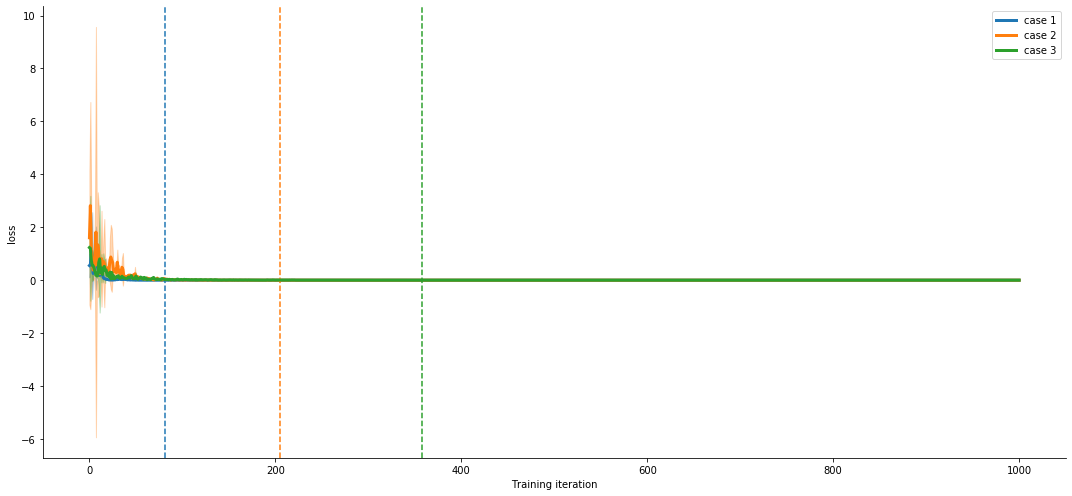

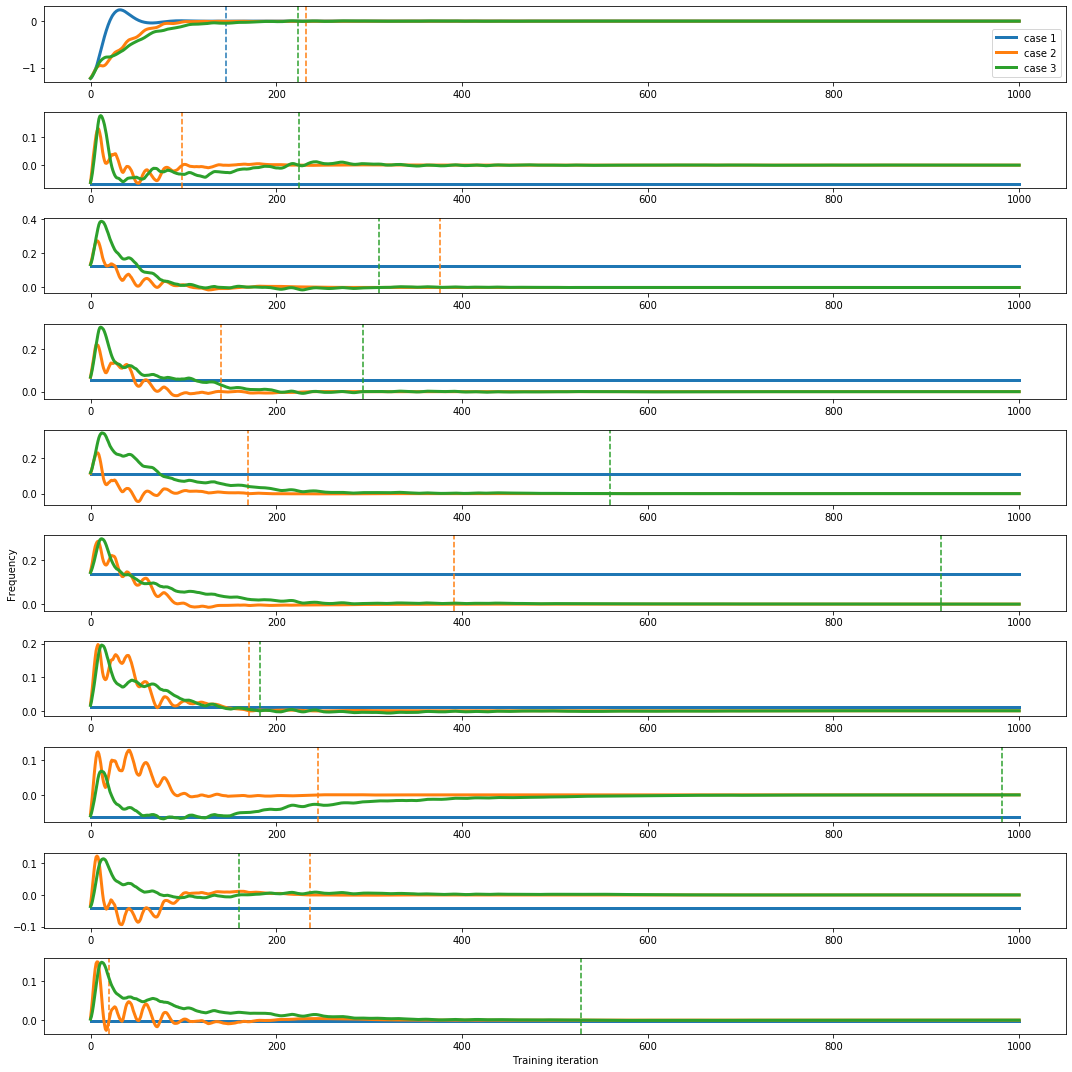

In [4]:
args = {"case": 1,
        "itr": 1001,
        "bsize": 1,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.1,
        "d": 10,
        "lr": 1e-2}

numb_runs = 10
case_list = [1,2,3]
loss_log = torch.zeros(args["itr"], numb_runs, len(case_list))
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, len(case_list))


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"], momentum = 0.9)
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
plot_loss_LR(loss_log)
plot_w_tilde_LR(w_tilde_log)
# plot_dw_tilde_LR(log["dw_tilde"])

100%|██████████| 30/30 [32:51<00:00, 68.87s/it]


Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold


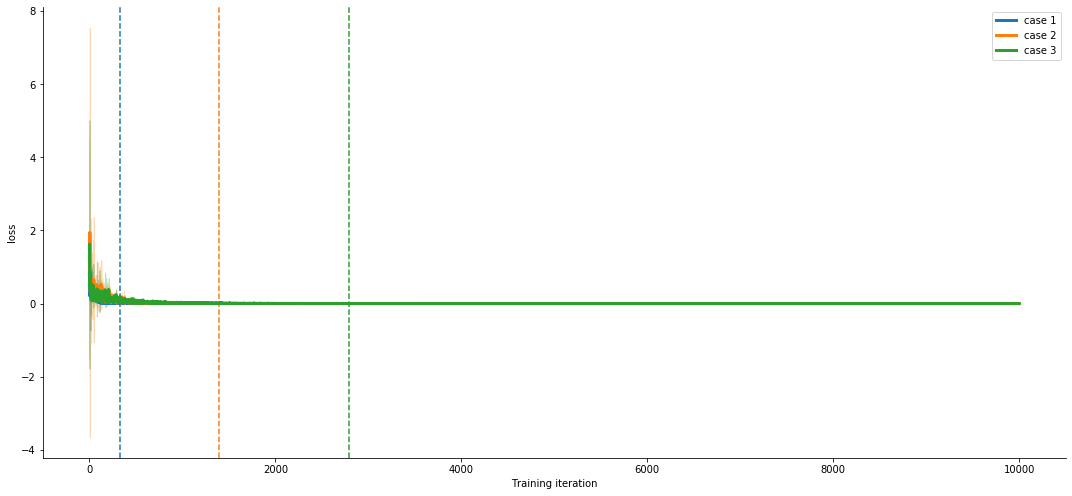

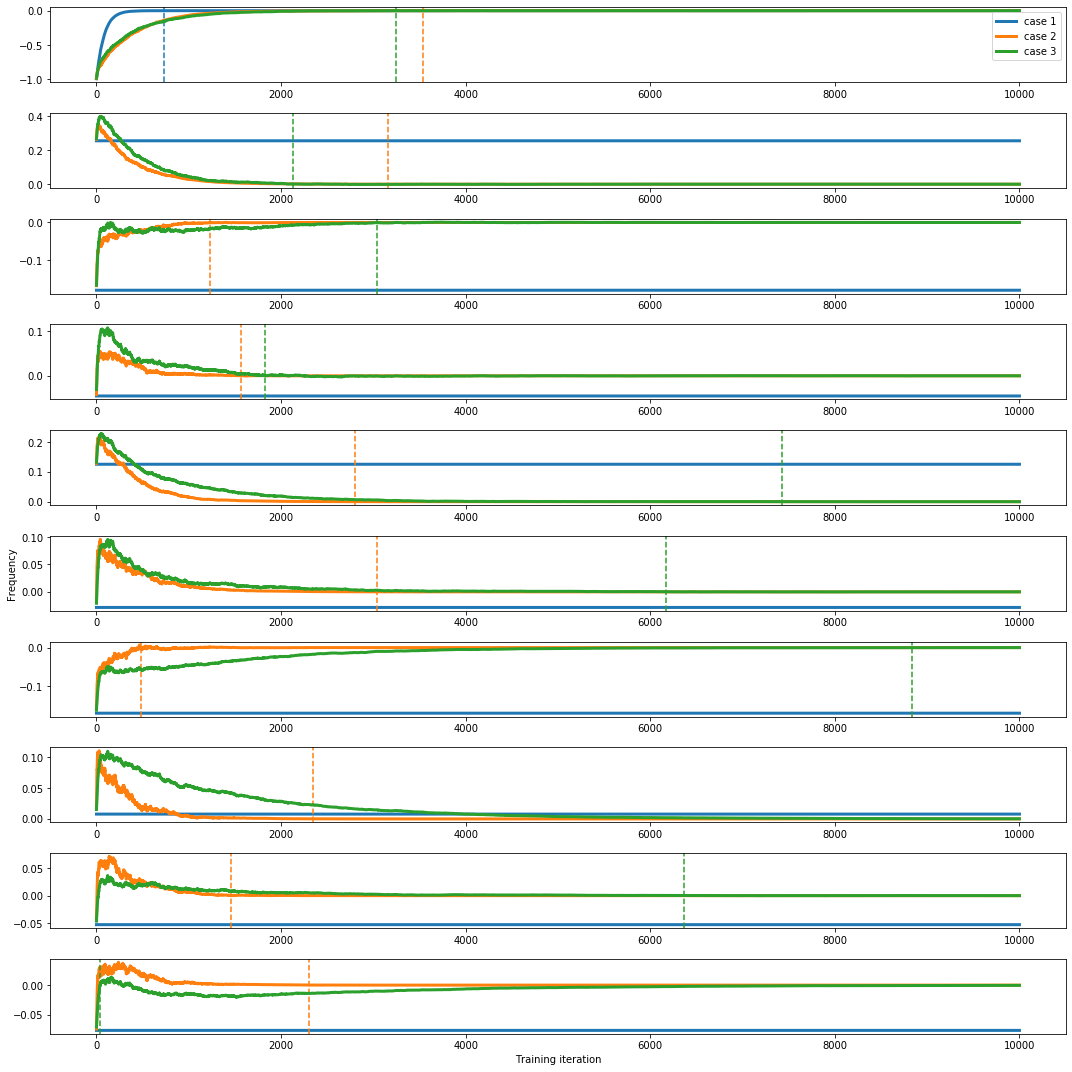

In [5]:
args = {"case": 1,
        "itr": 10001,
        "bsize": 1,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.1,
        "d": 10,
        "lr": 1e-2}

numb_runs = 10
case_list = [1,2,3]
loss_log = torch.zeros(args["itr"], numb_runs, len(case_list))
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, len(case_list))


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"])
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
plot_loss_LR(loss_log)
plot_w_tilde_LR(w_tilde_log)
# plot_dw_tilde_LR(log["dw_tilde"])

100%|██████████| 30/30 [03:19<00:00,  6.91s/it]


Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold


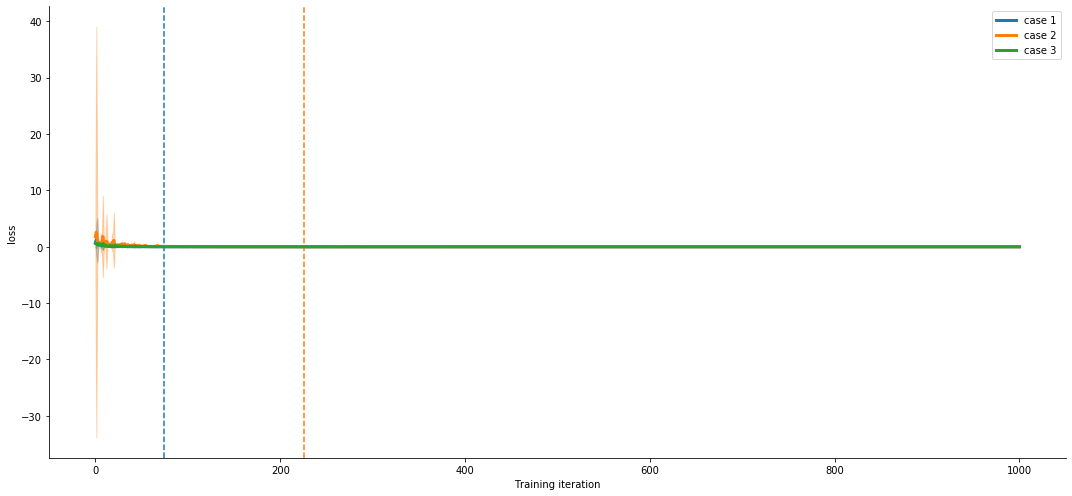

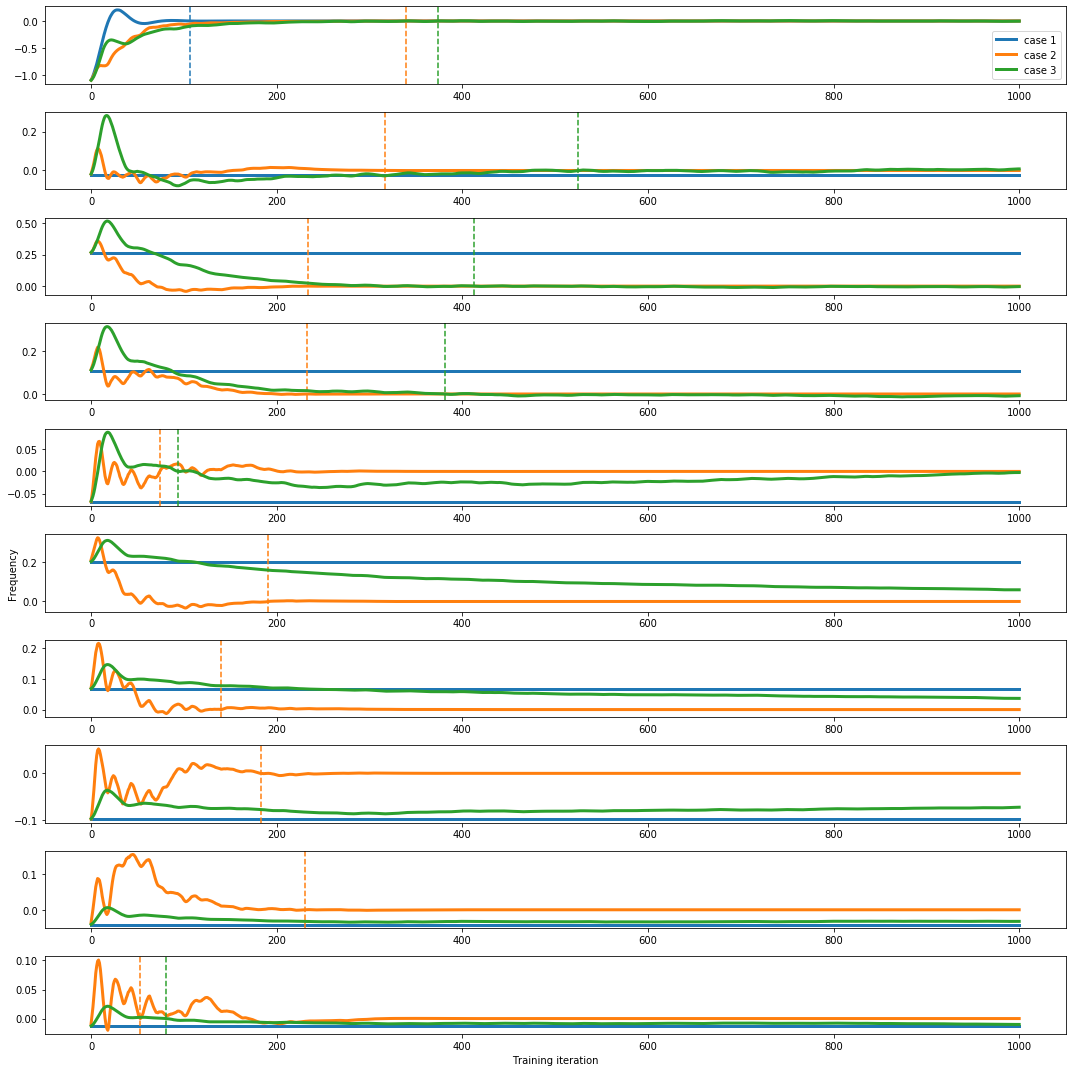

In [6]:
args = {"case": 1,
        "itr": 1001,
        "bsize": 1,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.3,
        "d": 10,
        "lr": 1e-2}

numb_runs = 10
case_list = [1,2,3]
loss_log = torch.zeros(args["itr"], numb_runs, len(case_list))
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, len(case_list))


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"], momentum = 0.9)
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
plot_loss_LR(loss_log)
plot_w_tilde_LR(w_tilde_log)
# plot_dw_tilde_LR(log["dw_tilde"])

100%|██████████| 30/30 [33:10<00:00, 69.30s/it]


Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold


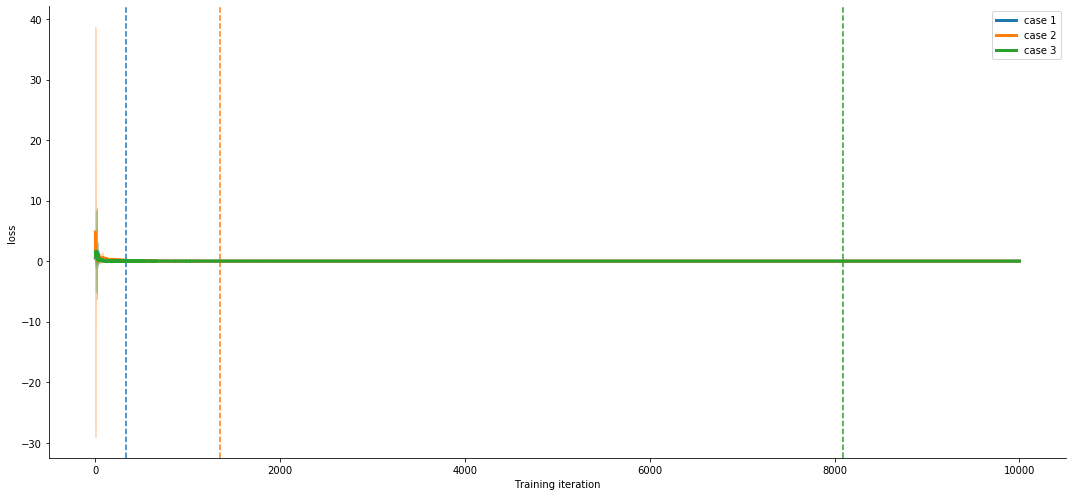

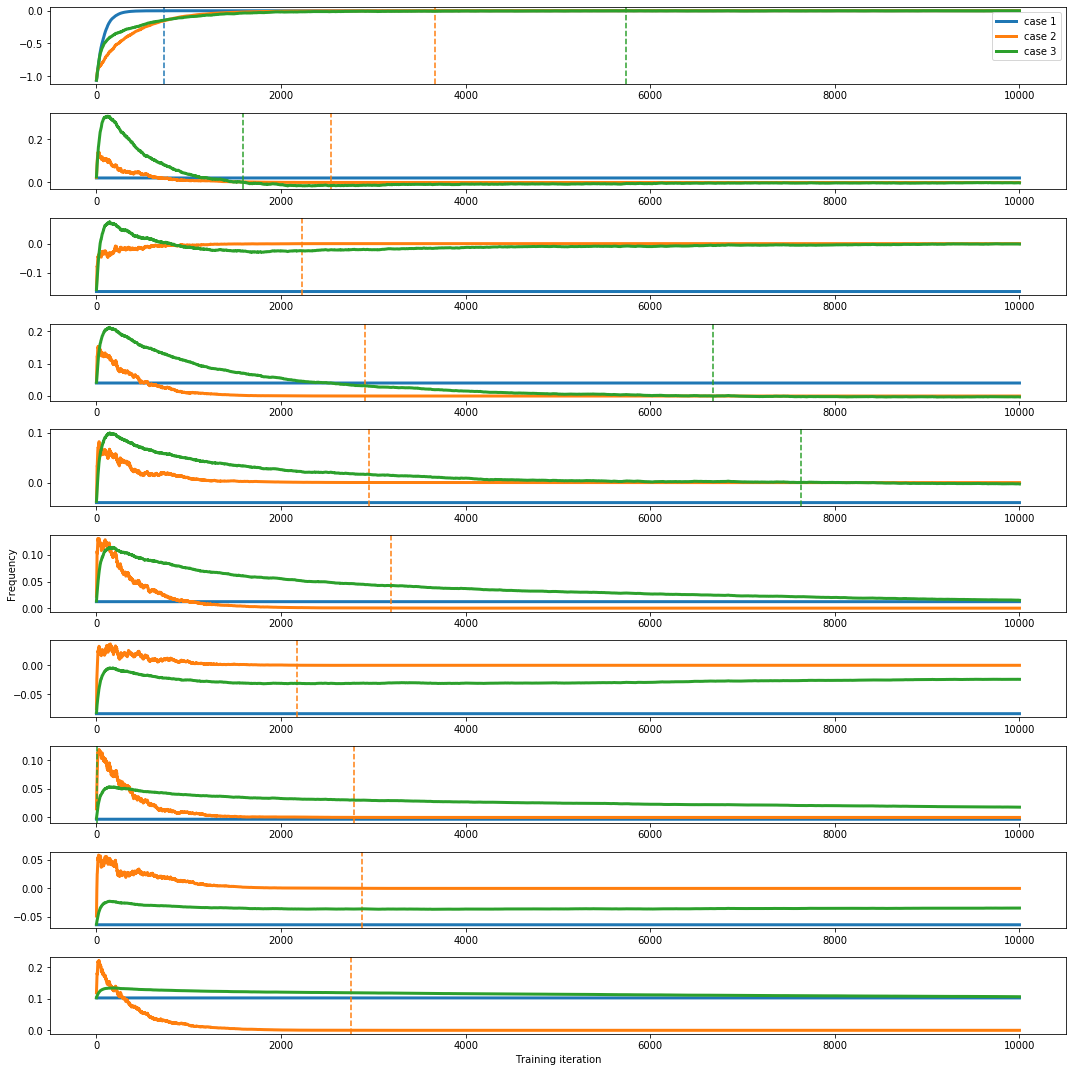

In [7]:
args = {"case": 1,
        "itr": 10001,
        "bsize": 1,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.3,
        "d": 10,
        "lr": 1e-2}

numb_runs = 10
case_list = [1,2,3]
loss_log = torch.zeros(args["itr"], numb_runs, len(case_list))
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, len(case_list))


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"])
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
plot_loss_LR(loss_log)
plot_w_tilde_LR(w_tilde_log)
# plot_dw_tilde_LR(log["dw_tilde"])

In [ ]:
args = {"case": 1,
        "itr": 11,
        "bsize": 1,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.1,
        "d": 10,
        "lr": 1e-2}

numb_runs = 1
case_list = [2]
loss_log = torch.zeros(args["itr"], numb_runs, len(case_list))
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, len(case_list))


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"])
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
# plot_loss_LR(loss_log)
# plot_w_tilde_LR(w_tilde_log)
plot_dw_tilde_LR(log["dw_tilde"])

100%|██████████| 1/1 [00:05<00:00,  5.74s/it]s/it, loss=1.12e-11]


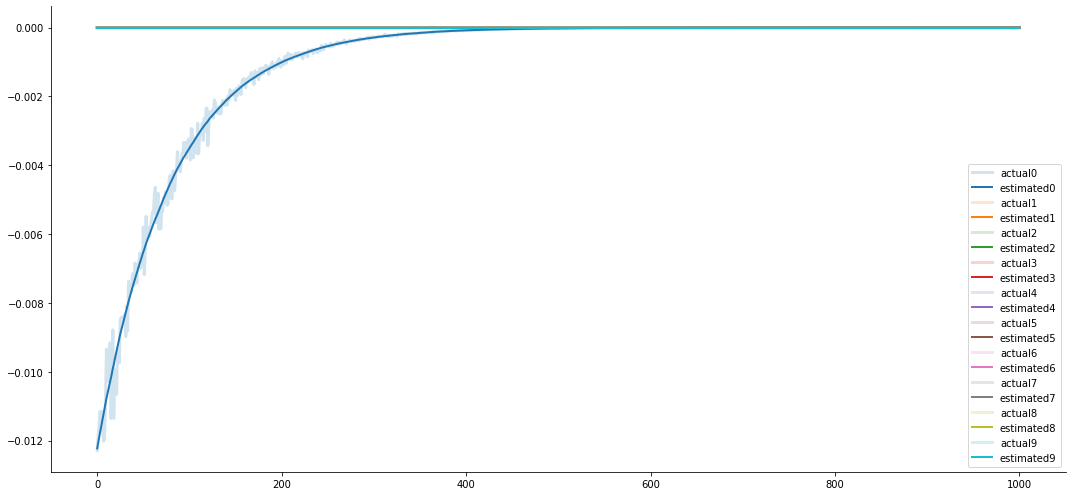

In [37]:
args = {"case": 1,
        "itr": 1001,
        "bsize": 128,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.1,
        "d": 10,
        "lr": 1e-2}

numb_runs = 1
case_list = [1,2,3]
loss_log = torch.zeros(args["itr"], numb_runs, 3)
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, 3)


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"])
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
plot_loss_LR(loss_log)
plot_w_tilde_LR(w_tilde_log)
# plot_dw_tilde_LR(log["dw_tilde"])

100%|██████████| 1/1 [00:08<00:00,  8.42s/it]s/it, loss=0.0061]


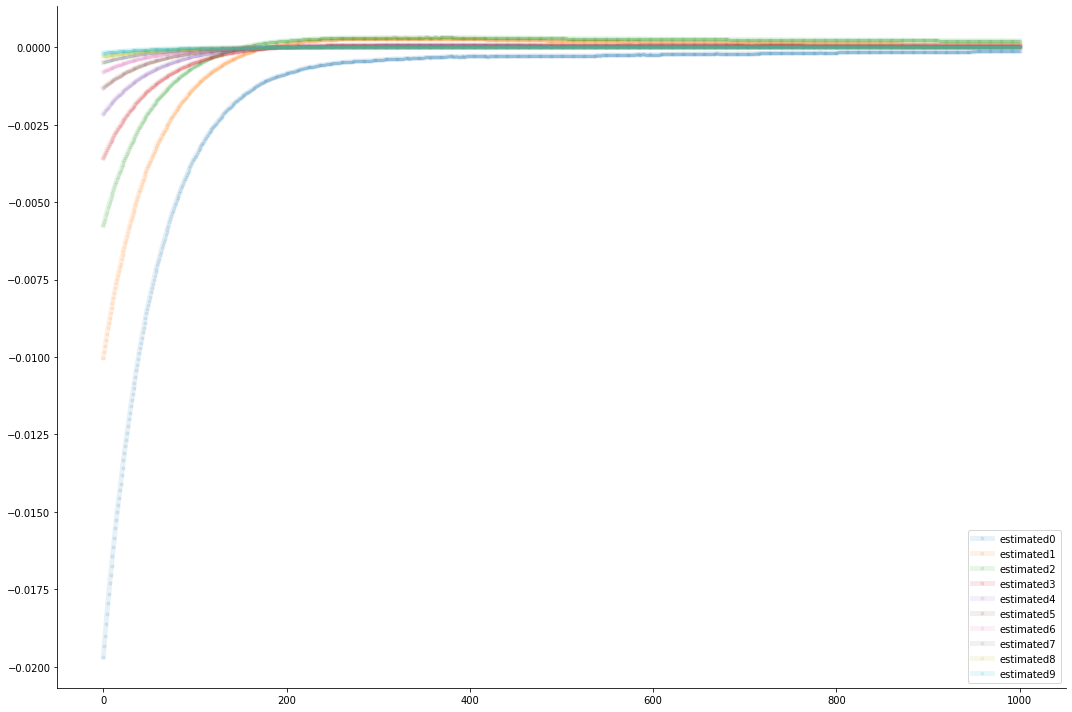

In [28]:
args = {"case": 1,
        "itr": 1001,
        "bsize": 128,
        "mu": 1,
        "std": 0.5,
        "lambbda": 0.5,
        "d": 10,
        "lr": 1e-2}

numb_runs = 1
case_list = [3]
loss_log = torch.zeros(args["itr"], numb_runs, 3)
w_tilde_log = torch.zeros(args["d"], args["itr"], numb_runs, 3)


with trange(numb_runs*len(case_list)) as t:
    for i in range(numb_runs):
        model = LR_model(args["d"]).to(_device)

        for j in case_list:

            args["case"] = j
            model_copy = copy.deepcopy(model)
            opt = optim.SGD(model_copy.parameters(), lr = args["lr"])
            log = train_LR(args, model_copy, opt, _device)
            loss_log[:,i, args["case"]-1] = log["loss"]
            w_tilde_log[:,:,i, args["case"]-1] = log["w_tilde"]
            
            t.update()
        
# plot_loss_LR(loss_log)
# plot_w_tilde_LR(w_tilde_log)
plot_dw_tilde_LR(log["dw_tilde"])

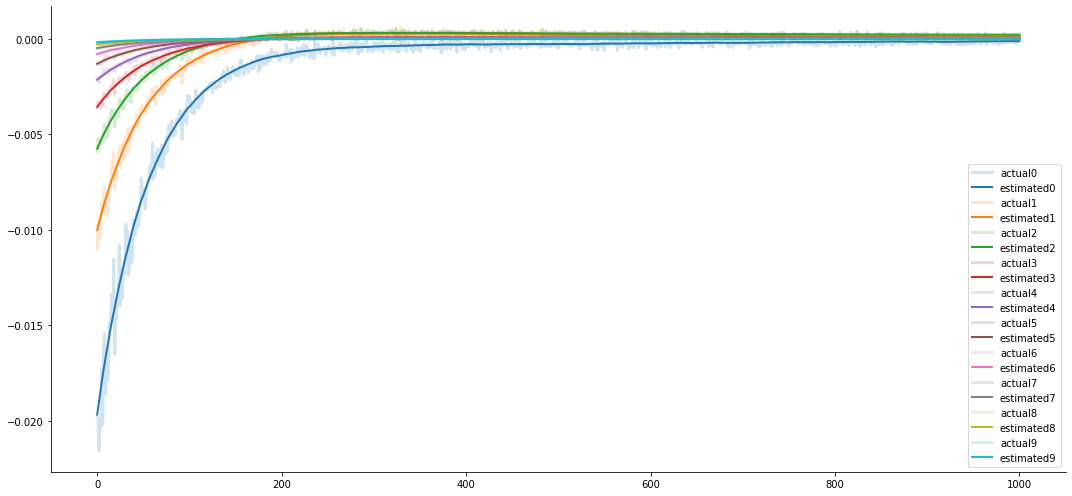

In [34]:
plot_dw_tilde_LR(log["dw_tilde"])

Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold
Above loss threshold


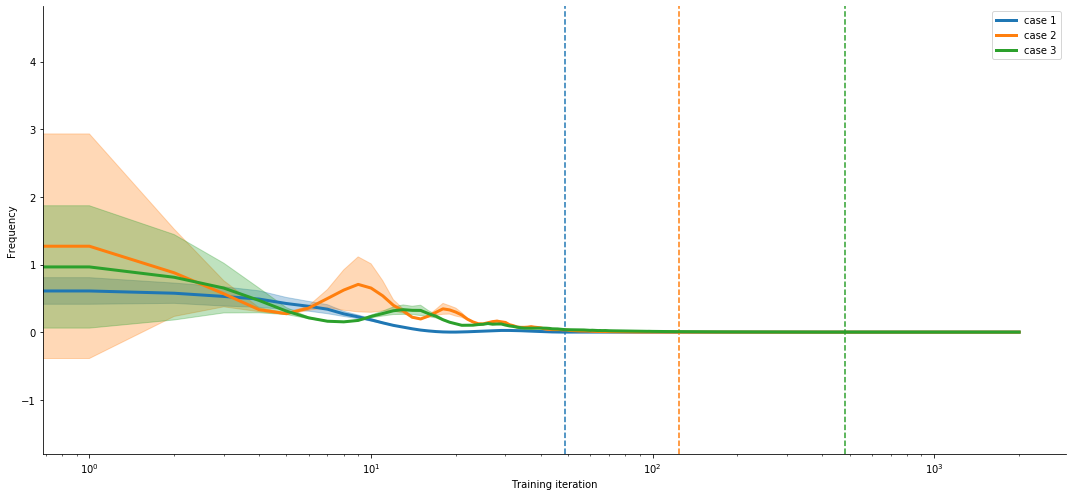

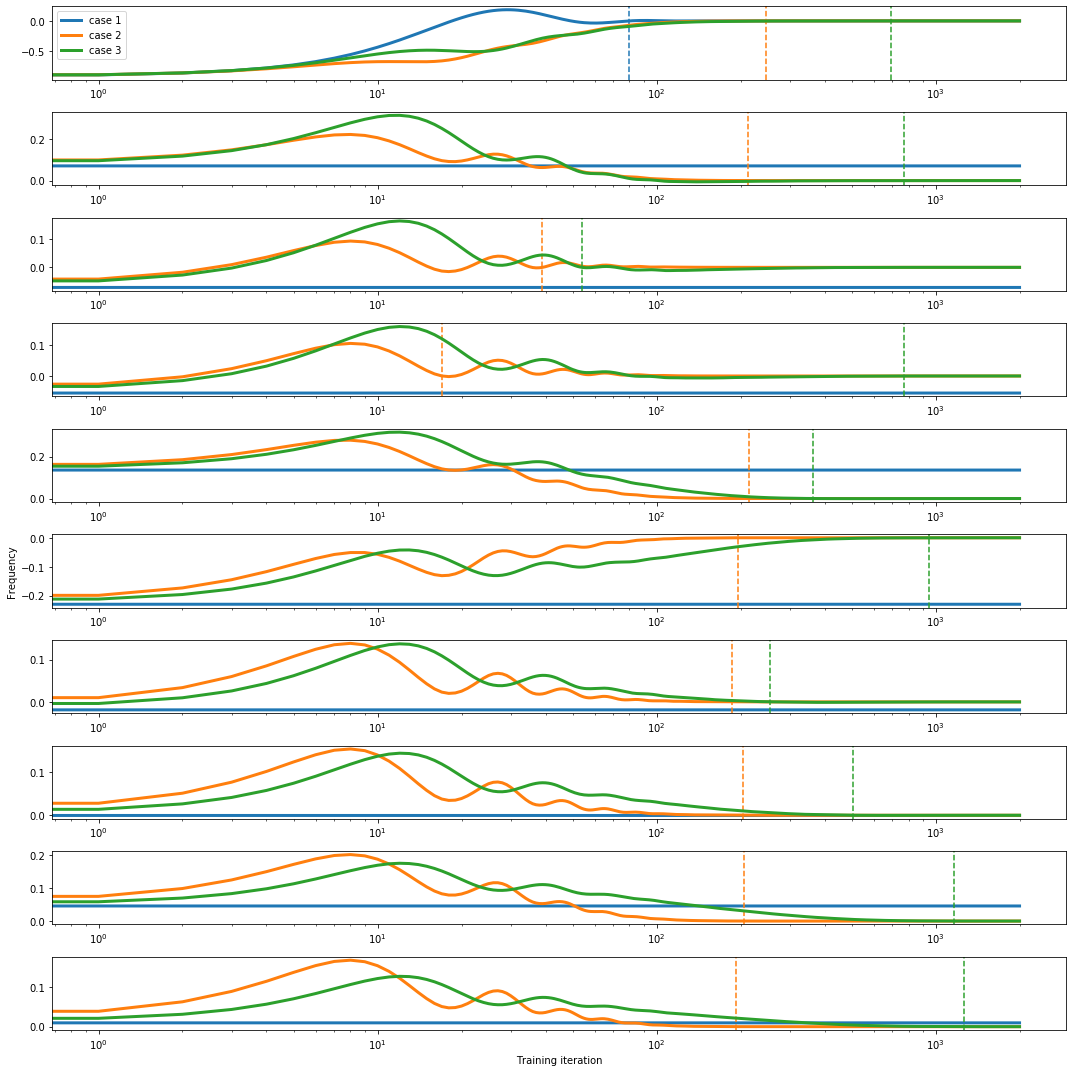

In [10]:
plot_loss_LR(loss_log)
plot_w_tilde_diff_LR(w_tilde_log)

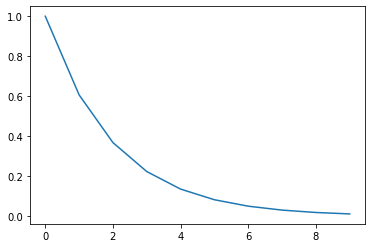

In [27]:
batchsize = 2
lambbda = 0.5
d = 10
alpha = torch.normal(mean = 1, std = 0.3, size = (d, batchsize))
decay = torch.exp(-lambbda*(torch.range(1, d)-1).view(d,1).repeat(1, batchsize))
x_tilde = decay
plt.plot(x_tilde[:,0])

100%|██████████| 1001/1001 [00:19<00:00, 50.31it/s, loss=2.04e-11, w_sum=-3.14]
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'Training iteration')

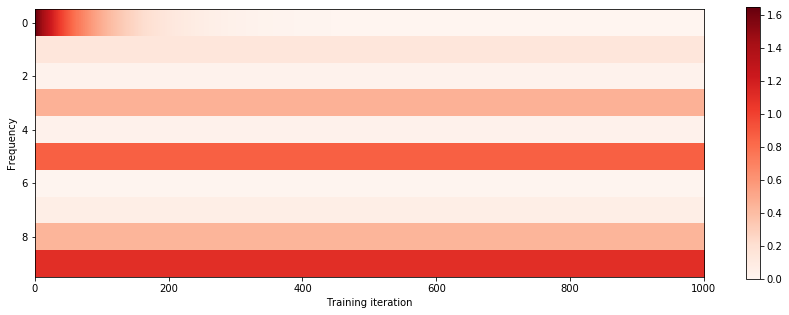

In [17]:
# initialize stuff

model1 = copy.deepcopy(model)

w_star = torch.zeros(d, 1, device = _device)
w_star[0] = 1
# W_F = getDCTmatrix(d, _device)
# W_F_w_star = torch.mm(W_F, w_star)
# w_star = torch.mm(w_star_tilde, w_star_tilde)
# model = Net(d).to(_device)
# w_init = list(model.parameters())[0][0].view(d,1)
# w_init_tilde = dct(w_init, _device)

lr = 1e-2
opt = optim.SGD(model1.parameters(), lr = lr)
itr = 1001

diff_map = torch.zeros(d, itr, device = _device)

grad_w_0 = torch.zeros(2, itr, device = _device)
loss_1 = torch.zeros(1, itr, device = _device)


bsize = 128
mu = 1
std = 0.5

with trange(itr) as t:
    for i in range(itr):
        
        
        w_prev = list(model1.parameters())[0][0].view(d,1)
        w_prev_tilde = dct(w_prev, _device)
        

        #case 1
        x_tilde = torch.zeros(d, bsize, device = _device)
        x_tilde[0,:] = torch.normal(mean = mu, std = std, size = (1,bsize), device = _device)
        #case 2
#         x_tilde = torch.normal(mean = 1, std = 1, size = (d, bsize), device = _device)
        #case 3
#             C = torch.rand(1, device = _device).item()
#             x_tilde = C*torch.exp(-C*(torch.range(1, d, device = _device)-1)).view(d,1)


        
        

        

        w_curr = list(model1.parameters())[0][0].view(d,1)
        w_curr_tilde = dct(w_curr, _device)
#         w_curr_tilde = torch.mm(iW_F, w_curr)
        w_tilde_diff = (w_curr_tilde - w_star).abs()
        diff_map[:,i] = w_tilde_diff.t()
#         ipdb.set_trace()
        grad_w_0[0,i] = (w_prev_tilde - w_curr_tilde)[0]
        grad_w_0[1,i] = lr*(w_prev_tilde[0]-1)*(mu**2 + std**2)

        t.set_postfix(loss = loss.item(), w_sum = w_curr_tilde[1:].sum().item() )
        t.update()

fig_test = plt.figure(figsize = [15,5])
gs = fig_test.add_gridspec(1,1)
p1 = fig_test.add_subplot(gs[0,0]).imshow(diff_map.cpu().detach().numpy(), cmap = 'Reds', aspect = 40.0, vmax = diff_map.max(), vmin = 0)
fig_test.colorbar(p1)
fig_test.add_subplot(gs[0,0]).set_ylabel("Frequency")
fig_test.add_subplot(gs[0,0]).set_xlabel("Training iteration")
# fig_test.add_subplot(gs[0,0]).set_title('Log Mean Fourier Spectrum \n of MNIST:' + r'Log $\frac{1}{n}$ \Sigma F{x_{i}')

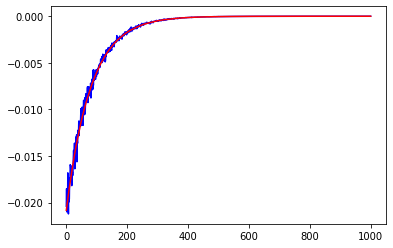

In [18]:
grad_w_0_case1_actual = grad_w_0[0].squeeze().detach().cpu().numpy()
grad_w_0_case1_estimate = grad_w_0[1].squeeze().detach().cpu().numpy()
plt.plot(grad_w_0_case1_actual,'b')
plt.plot(grad_w_0_case1_estimate,'r')

100%|██████████| 1001/1001 [00:21<00:00, 47.51it/s, loss=0.00238, w_sum=0.0988]
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'Training iteration')

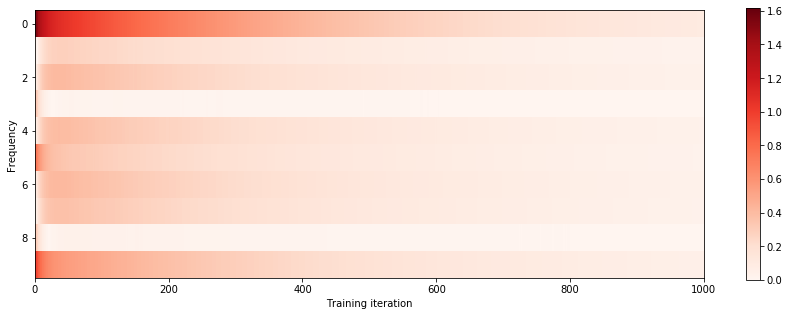

In [19]:
# initialize stuff

model2 = copy.deepcopy(model)
w_star = torch.zeros(d, 1, device = _device)
w_star[0] = 1
# W_F = getDCTmatrix(d, _device)
# W_F_w_star = torch.mm(W_F, w_star)
# w_star = torch.mm(w_star_tilde, w_star_tilde)
# model = Net(d).to(_device)
# w_init = list(model.parameters())[0][0].view(d,1)
# w_init_tilde = dct(w_init, _device)

lr = 1e-2
opt = optim.SGD(model2.parameters(), lr = lr)
itr = 1001

diff_map = torch.zeros(d, itr, device = _device)

grad_w_0 = torch.zeros(2, itr, device = _device)

loss_2 = torch.zeros(1, itr, device = _device)

bsize = 128
mu = 1
std = 0.5

with trange(itr) as t:
    for i in range(itr):
        
        
        w_prev = list(model2.parameters())[0][0].view(d,1)
        w_prev_tilde = dct(w_prev, _device)
        

        #case 1
#         x_tilde = torch.zeros(d, bsize, device = _device)
#         x_tilde[0,:] = torch.normal(mean = mu, std = std, size = (1,bsize), device = _device)
        #case 2
        x_tilde = torch.normal(mean = mu, std = std, size = (d, bsize), device = _device)
        #case 3
#             C = torch.rand(1, device = _device).item()
#             x_tilde = C*torch.exp(-C*(torch.range(1, d, device = _device)-1)).view(d,1)


        x = idct(x_tilde, _device)
#         noise = torch.normal(mean= 0, std = 0.01, size = (1,1), device = _device)
        y = torch.mm(w_star.t(), x_tilde)
        opt.zero_grad()

        y_hat = model2(x)
        
#         ipdb.set_trace()
        loss = ((1/2) * (y_hat.t() - y) ** 2).mean()
        loss_2[:,i] = loss.item()
        
#         ipdb.set_trace()

        loss.backward()
        opt.step()

        

        w_curr = list(model2.parameters())[0][0].view(d,1)
        w_curr_tilde = dct(w_curr, _device)
#         w_curr_tilde = torch.mm(iW_F, w_curr)
        w_tilde_diff = (w_curr_tilde - w_star).abs()
        diff_map[:,i] = w_tilde_diff.t()
#         ipdb.set_trace()
        grad_w_0[0,i] = (w_prev_tilde - w_curr_tilde)[0]
        grad_w_0[1,i] = lr*(w_prev_tilde[1:].sum()*mu**2 + (w_prev_tilde[0]-1)*(mu**2 + std**2))
#         log_dict["w_tilde"] += [()]

        t.set_postfix(loss = loss.item(), w_sum = w_curr_tilde[1:].sum().item() )
        t.update()

fig_test = plt.figure(figsize = [15,5])
gs = fig_test.add_gridspec(1,1)
p1 = fig_test.add_subplot(gs[0,0]).imshow(diff_map.cpu().detach().numpy(), cmap = 'Reds', aspect = 40.0, vmax = diff_map.max(), vmin = 0)
fig_test.colorbar(p1)
fig_test.add_subplot(gs[0,0]).set_ylabel("Frequency")
fig_test.add_subplot(gs[0,0]).set_xlabel("Training iteration")
# fig_test.add_subplot(gs[0,0]).set_title('Log Mean Fourier Spectrum \n of MNIST:' + r'Log $\frac{1}{n}$ \Sigma F{x_{i}')

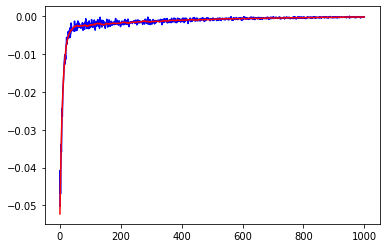

In [20]:
grad_w_0_case2_actual = grad_w_0[0].squeeze().detach().cpu().numpy()
grad_w_0_case2_estimate = grad_w_0[1].squeeze().detach().cpu().numpy()
plt.plot(grad_w_0_case2_actual,'b')
plt.plot(grad_w_0_case2_estimate,'r')

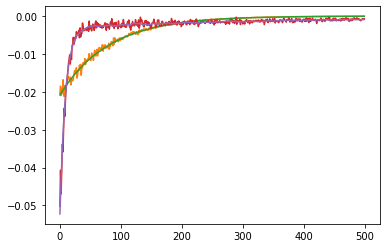

In [21]:
plt.plot(grad_w_0_case1_actual[:500],'C1')
plt.plot(grad_w_0_case1_estimate[:500],'C2')
plt.plot(grad_w_0_case2_actual[:500],'C3')
plt.plot(grad_w_0_case2_estimate[:500],'C4')

  0%|          | 0/1001 [00:00<?, ?it/s]/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
100%|██████████| 1001/1001 [00:21<00:00, 46.21it/s, loss=9.86e-15, w_sum=1.18]
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axe

Text(0.5, 0, 'Training iteration')

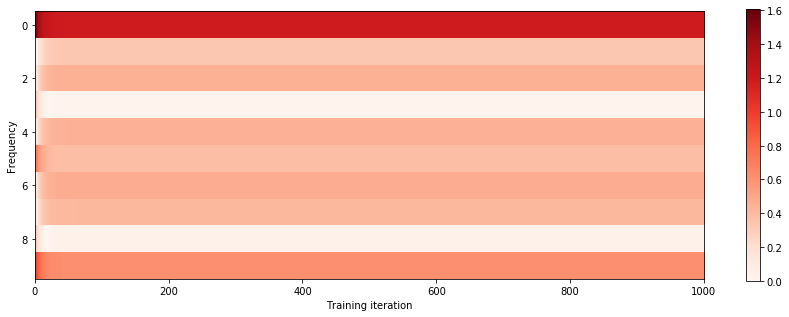

In [22]:
# initialize stuff

model3 = copy.deepcopy(model)
w_star = torch.zeros(d, 1, device = _device)
w_star[0] = 1
# W_F = getDCTmatrix(d, _device)
# W_F_w_star = torch.mm(W_F, w_star)
# w_star = torch.mm(w_star_tilde, w_star_tilde)
# model = Net(d).to(_device)
# w_init = list(model.parameters())[0][0].view(d,1)
# w_init_tilde = dct(w_init, _device)

lr = 1e-2
opt = optim.SGD(model3.parameters(), lr = lr)
itr = 1001

diff_map = torch.zeros(d, itr, device = _device)

grad_w_0 = torch.zeros(2, itr, device = _device)
loss_3 = torch.zeros(1, itr, device = _device)

bsize = 128
mu = 1
std = 0.5
lambdda = 0

with trange(itr) as t:
    for i in range(itr):
        
        
        w_prev = list(model3.parameters())[0][0].view(d,1)
        w_prev_tilde = dct(w_prev, _device)
        

        #case 1
#         x_tilde = torch.zeros(d, bsize, device = _device)
#         x_tilde[0,:] = torch.normal(mean = 1, std = 1, size = (1,bsize), device = _device)
        #case 2
#         x_tilde = torch.normal(mean = 1, std = 1, size = (d, bsize), device = _device)
        #case 3
        C = torch.normal(mean = mu, std = std, size = (1, bsize), device = _device).repeat(d,1)
#         decay = lambdda* torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1).repeat(1, bsize))
        decay = torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1).repeat(1, bsize))

        x_tilde = C * decay


        x = idct(x_tilde, _device)
#         noise = torch.normal(mean= 0, std = 0.01, size = (1,1), device = _device)
        y = torch.mm(w_star.t(), x_tilde)
        opt.zero_grad()

        y_hat = model3(x)
        
        loss = ((1/2) * (y_hat.t() - y) ** 2).mean()
        loss_3[:,i] = loss.item()

        loss.backward()
        opt.step()

        w_curr = list(model3.parameters())[0][0].view(d,1)
        w_curr_tilde = dct(w_curr, _device)
#         w_curr_tilde = torch.mm(iW_F, w_curr)
        w_tilde_diff = (w_curr_tilde - w_star).abs()
        diff_map[:,i] = w_tilde_diff.t()
#         ipdb.set_trace()
        grad_w_0[0,i] = (w_prev_tilde - w_curr_tilde)[0]
        grad_w_0[1,i] = lr*( (mu**2 * lambdda**2 * w_curr_tilde * torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1)))[1:].sum() + lambdda**2*(w_prev_tilde[0]-1)*(mu**2 + std**2))
#         log_dict["w_tilde"] += [()]

        t.set_postfix(loss = loss.item(), w_sum = w_curr_tilde[1:].sum().item() )
        t.update()

fig_test = plt.figure(figsize = [15,5])
gs = fig_test.add_gridspec(1,1)
p1 = fig_test.add_subplot(gs[0,0]).imshow(diff_map.cpu().detach().numpy(), cmap = 'Reds', aspect = 40.0, vmax = diff_map.max(), vmin = 0)
fig_test.colorbar(p1)
fig_test.add_subplot(gs[0,0]).set_ylabel("Frequency")
fig_test.add_subplot(gs[0,0]).set_xlabel("Training iteration")
# fig_test.add_subplot(gs[0,0]).set_title('Log Mean Fourier Spectrum \n of MNIST:' + r'Log $\frac{1}{n}$ \Sigma F{x_{i}')

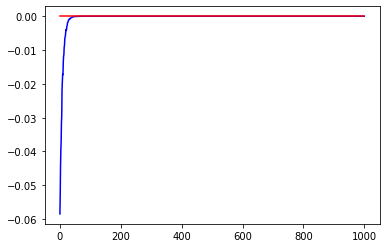

In [23]:
grad_w_0_case3_actual = grad_w_0[0].squeeze().detach().cpu().numpy()
grad_w_0_case3_estimate = grad_w_0[1].squeeze().detach().cpu().numpy()
plt.plot(grad_w_0_case3_actual,'b')
plt.plot(grad_w_0_case3_estimate,'r')

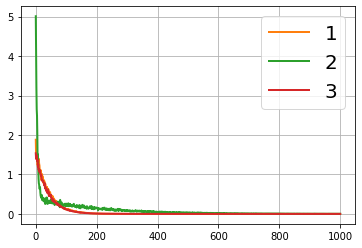

In [163]:
loss_1_np = loss_1.squeeze().detach().cpu().numpy()
loss_2_np = loss_2.squeeze().detach().cpu().numpy()
loss_3_np = loss_3.squeeze().detach().cpu().numpy()
plt.plot(loss_1_np,'C1', label = "1", linewidth=2.0, marker = "")
plt.plot(loss_2_np,'C2', label = "2", linewidth=2.0, marker = "")
plt.plot(loss_3_np,'C3', label = "3", linewidth=2.0, marker = "")
plt.grid()
plt.legend(prop={"size": 20})

/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


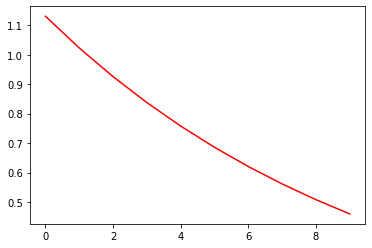

In [7]:
C = torch.normal(mean = mu, std = std, size = (1, bsize), device = _device).repeat(d,1)
#         decay = lambdda* torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1).repeat(1, bsize))
decay = torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1).repeat(1, bsize))

x_tilde = C * decay
plt.plot(x_tilde[:,0].detach().cpu().numpy(), 'r')


  0%|          | 0/1001 [00:00<?, ?it/s]/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
100%|██████████| 1001/1001 [00:21<00:00, 45.75it/s, loss=1.29e-14, w_sum=1.18]
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axe

Text(0.5, 0, 'Training iteration')

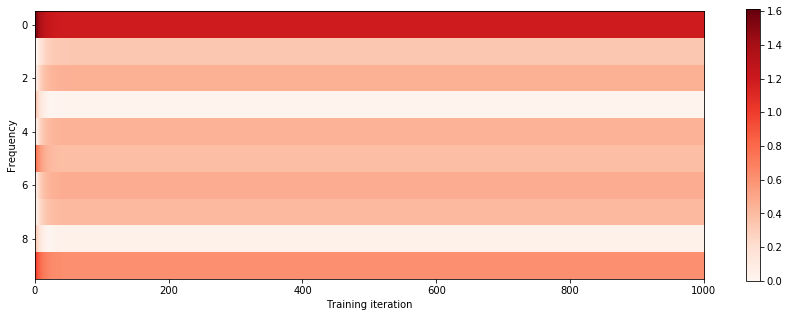

In [12]:
# initialize stuff

model3 = copy.deepcopy(model)
w_star = torch.zeros(d, 1, device = _device)
w_star[0] = 1
# W_F = getDCTmatrix(d, _device)
# W_F_w_star = torch.mm(W_F, w_star)
# w_star = torch.mm(w_star_tilde, w_star_tilde)
# model = Net(d).to(_device)
# w_init = list(model.parameters())[0][0].view(d,1)
# w_init_tilde = dct(w_init, _device)

lr = 1e-2
opt = optim.SGD(model3.parameters(), lr = lr)
itr = 1001

diff_map = torch.zeros(d, itr, device = _device)

grad_w_0 = torch.zeros(2, itr, device = _device)
loss_3 = torch.zeros(1, itr, device = _device)

bsize = 128
mu = 1
std = 0.3
lambdda = 0

with trange(itr) as t:
    for i in range(itr):
        
        
        w_prev = list(model3.parameters())[0][0].view(d,1)
        w_prev_tilde = dct(w_prev, _device)
        

        #case 1
#         x_tilde = torch.zeros(d, bsize, device = _device)
#         x_tilde[0,:] = torch.normal(mean = 1, std = 1, size = (1,bsize), device = _device)
        #case 2
#         x_tilde = torch.normal(mean = 1, std = 1, size = (d, bsize), device = _device)
        #case 3
        C = torch.normal(mean = mu, std = std, size = (1, bsize), device = _device).repeat(d,1)
#         decay = lambdda* torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1).repeat(1, bsize))
        decay = torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1).repeat(1, bsize))

        x_tilde = C * decay


        x = idct(x_tilde, _device)
#         noise = torch.normal(mean= 0, std = 0.01, size = (1,1), device = _device)
        y = torch.mm(w_star.t(), x_tilde)
        opt.zero_grad()

        y_hat = model3(x)
        
        loss = ((1/2) * (y_hat.t() - y) ** 2).mean()
        loss_3[:,i] = loss.item()

        loss.backward()
        opt.step()

        w_curr = list(model3.parameters())[0][0].view(d,1)
        w_curr_tilde = dct(w_curr, _device)
#         w_curr_tilde = torch.mm(iW_F, w_curr)
        w_tilde_diff = (w_curr_tilde - w_star).abs()
        diff_map[:,i] = w_tilde_diff.t()
#         ipdb.set_trace()
        grad_w_0[0,i] = (w_prev_tilde - w_curr_tilde)[0]
        grad_w_0[1,i] = lr*( (mu**2 * w_curr_tilde * torch.exp(-lambdda*(torch.range(1, d, device = _device)-1).view(d,1)))[1:].sum() + (w_prev_tilde[0]-1)*(mu**2 + std**2))
#         log_dict["w_tilde"] += [()]

        t.set_postfix(loss = loss.item(), w_sum = w_curr_tilde[1:].sum().item() )
        t.update()

fig_test = plt.figure(figsize = [15,5])
gs = fig_test.add_gridspec(1,1)
p1 = fig_test.add_subplot(gs[0,0]).imshow(diff_map.cpu().detach().numpy(), cmap = 'Reds', aspect = 40.0, vmax = diff_map.max(), vmin = 0)
fig_test.colorbar(p1)
fig_test.add_subplot(gs[0,0]).set_ylabel("Frequency")
fig_test.add_subplot(gs[0,0]).set_xlabel("Training iteration")
# fig_test.add_subplot(gs[0,0]).set_title('Log Mean Fourier Spectrum \n of MNIST:' + r'Log $\frac{1}{n}$ \Sigma F{x_{i}')